In [1]:
from scripts.imports import os, glob, pdb, np, h5py, pd, xr, gpd, Proj, Transformer, CRS, \
                        plt, cmap, Model, Data, ODR, datetime, rasterio, show, \
                        ccrs, cfeature
from scripts.classes_fixed import *
from scripts.pvpg_gt import *
from scripts.track_pairs import *
from scripts.pvpg_gt_penalized import pvpg_gt_penalized

# Outliers in $\rho_v/\rho_g$ Estimation

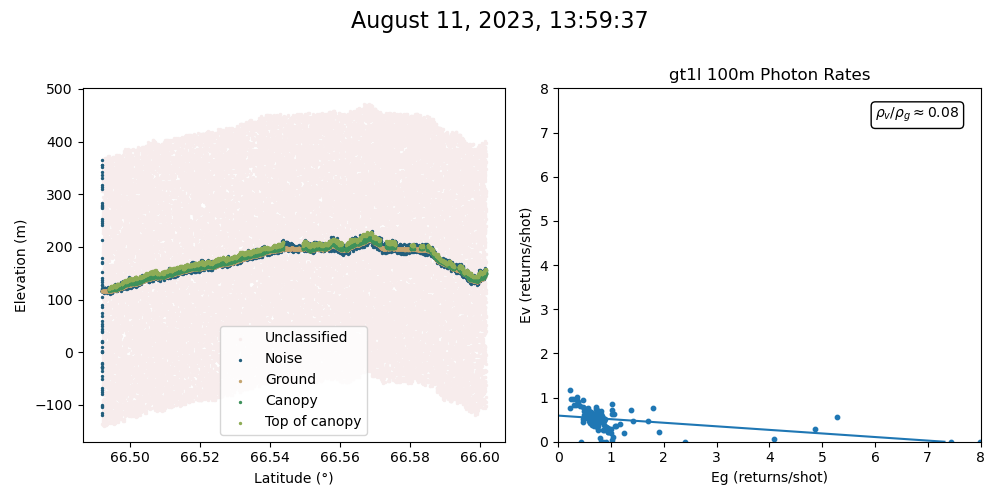

In [2]:
%matplotlib ipympl

dirpath = '../data/rovaniemi_w/'
all_ATL03, all_ATL08 = track_pairs(dirpath)

N = 45
gt = 'gt1l'
atl03path = all_ATL03[N]
atl08path = all_ATL08[N]

pvpg_gt(atl03path, atl08path, gt)

### Segments with abnormally high $E_g$

In [3]:
atl03 = ATL03(atl03path, atl08path, gt)
atl08 = ATL08(atl08path, gt)
atl08.df[atl08.df.Eg > 4]

lat        lon          gh            ch    Ng  Nv        Eg  \
32  66.572678  25.250801  196.695724  3.402823e+38   580   0  4.084507   
58  66.549500  25.244070  196.332703  1.371860e+01   729  54  5.282609   
59  66.548607  25.243814  196.272919  3.402823e+38  1119   0  7.992857   
60  66.547714  25.243547  196.450684  3.402823e+38  1042   0  7.442857   
61  66.546822  25.243294  196.498062  3.402823e+38  1372   0  9.730496   
62  66.545937  25.243048  196.892670  3.402823e+38   675   0  4.856115   

          Ev  
32  0.070423  
58  0.557971  
59  0.000000  
60  0.000000  
61  0.000000  
62  0.294964

### Show location of relevant segments on a map

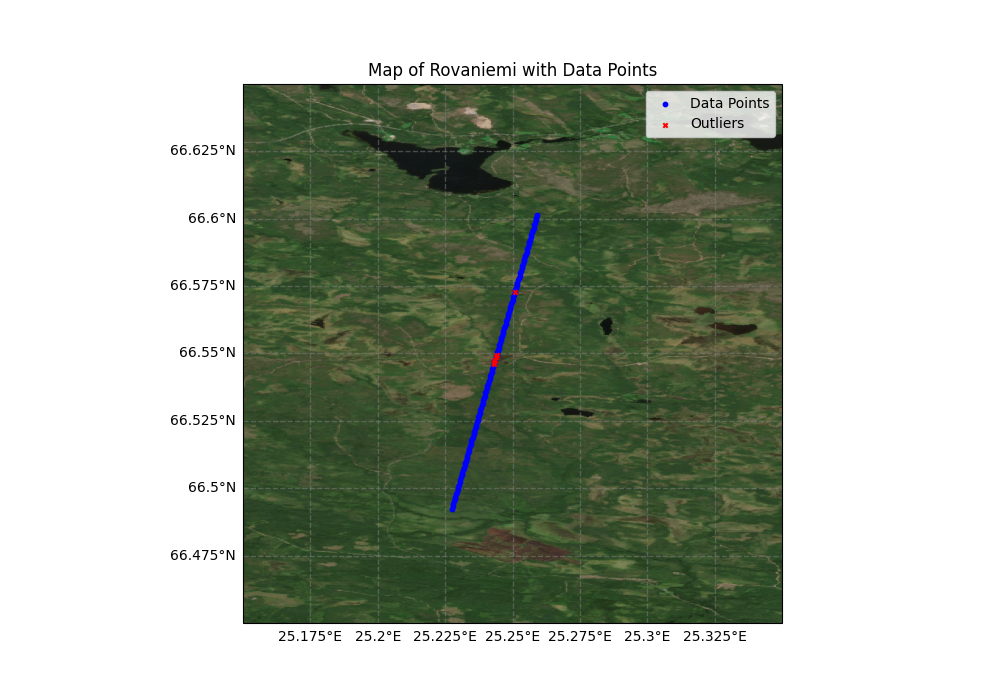

In [4]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# Sample DataFrame with latitude and longitude columns
# Replace this with your actual DataFrame
df = atl08.df.loc[:,['lat','lon']]
df_outlier = atl08.df[atl08.df.Eg > 4].loc[:,['lat','lon']]

# Create a map with Cartopy
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize = (10,7))
ax.set_extent([25.15,25.35,66.45,66.65])  # Set the map extent to cover Edinburgh

# Plot points from the DataFrame
ax.scatter(df['lon'], df['lat'], color='b', marker='o', label='Data Points', zorder=3, s=10)
ax.scatter(df_outlier['lon'], df_outlier['lat'], color='r', marker='x', label='Outliers', zorder=4, s=10)

tif = rasterio.open(dirpath + '/rovaniemi_image.tiff')
show(tif, ax=ax, transform=ccrs.PlateCarree())

# Add labels, title, and legend
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Map of Rovaniemi with Data Points')
ax.legend()

# Add latitude and longitude gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=1, color='gray', alpha=0.5)
gl.top_labels = gl.right_labels = False  # Updated lines
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()

# Show the plot
plt.show()

All the outliers occur on or partially on patches of darker marshland. The lighter marshland visible in the bottom left figure does not yield similar outliers. Instead of deleting the entries with arbitrarily large values of Ev, I changed the value of these entries to 0. The classified track above show segments with no canopy cover and the track plot shows that all problem entries occurred over such treeless spaces. Thus, I felt that this change was justified; it seems like more of a data entry issue that data collection issue.

<center><img src="../data/rovaniemi_w/marsh1.png" width=440> <img src="../data/rovaniemi_w/marsh2.png" width=400></center>

<center><img src="../data/rovaniemi_w/plot1.png" width=500> <img src="../data/rovaniemi_w/plot2.png" width=500></center>

### Penalized orthogonal distance regression



N = 0, s = 0.1


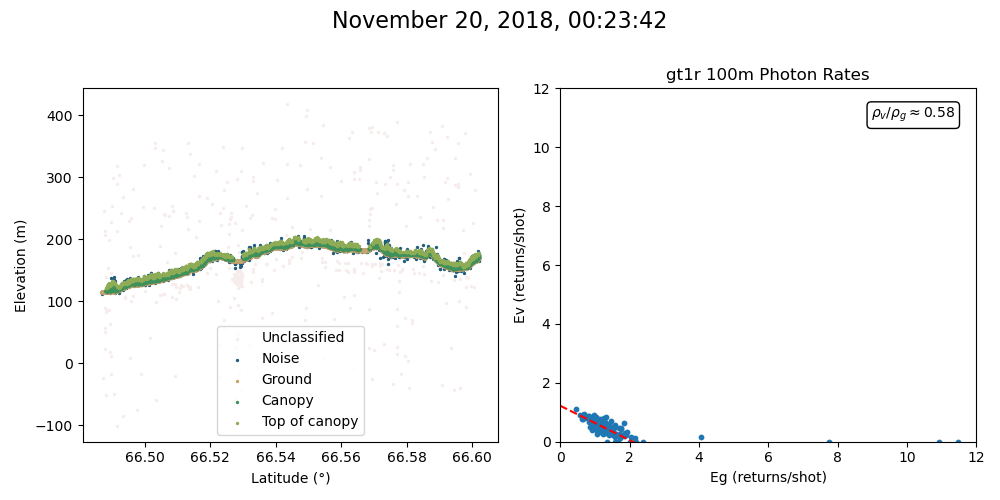

N = 1, s = 0.1
N = 2, s = 0.1


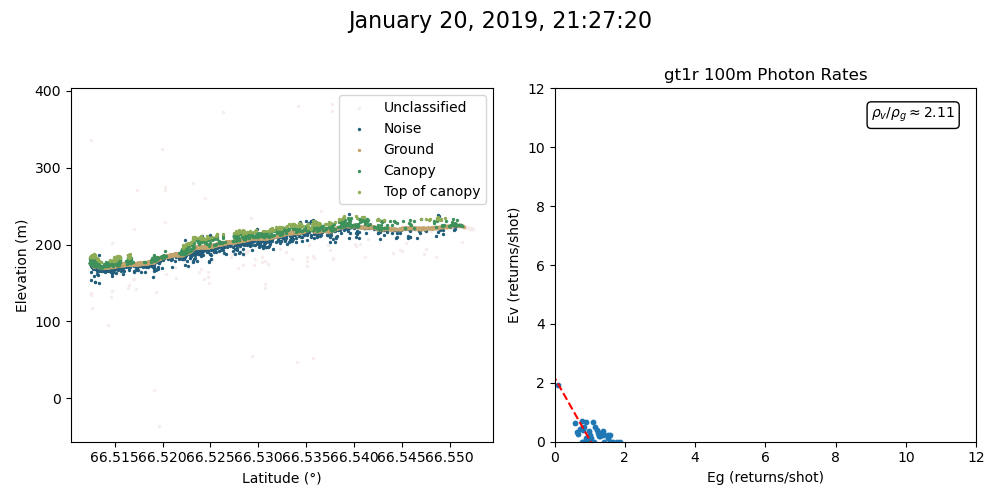

N = 3, s = 0.1


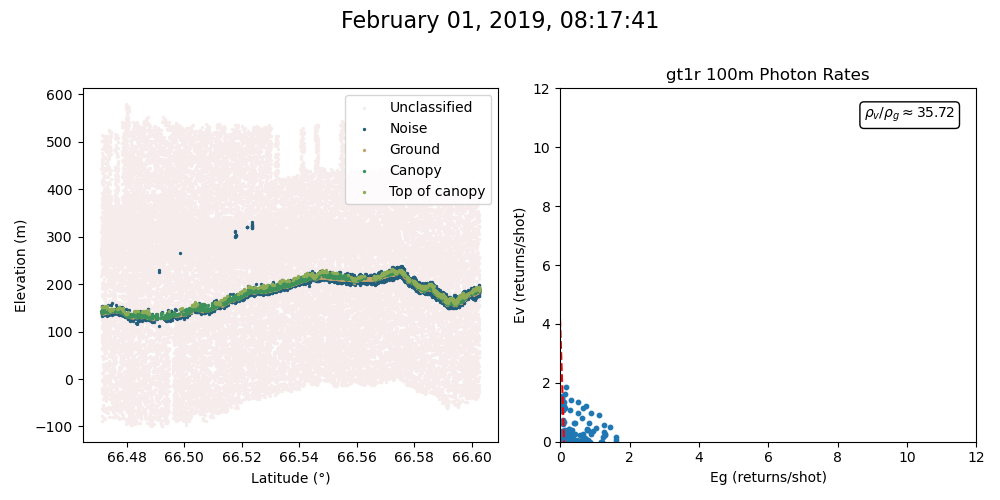

N = 4, s = 0.1
N = 5, s = 0.1


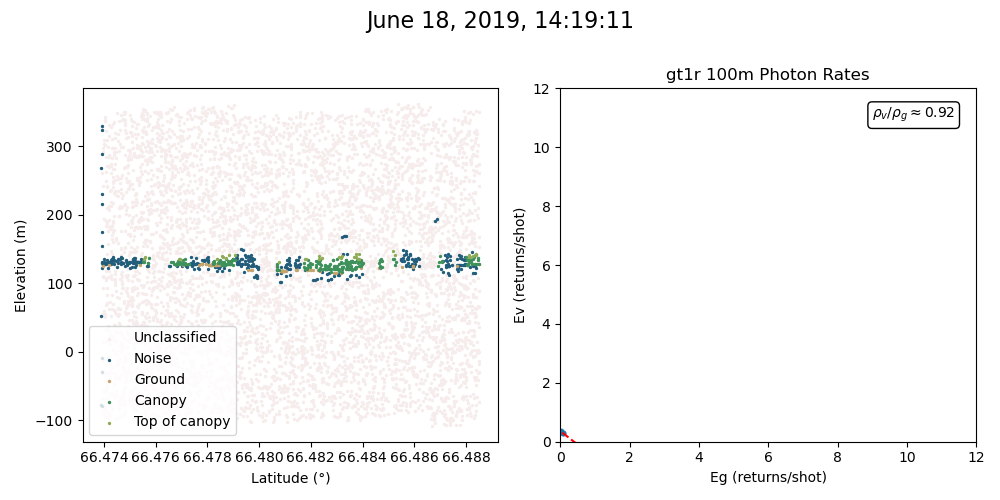

N = 6, s = 0.1


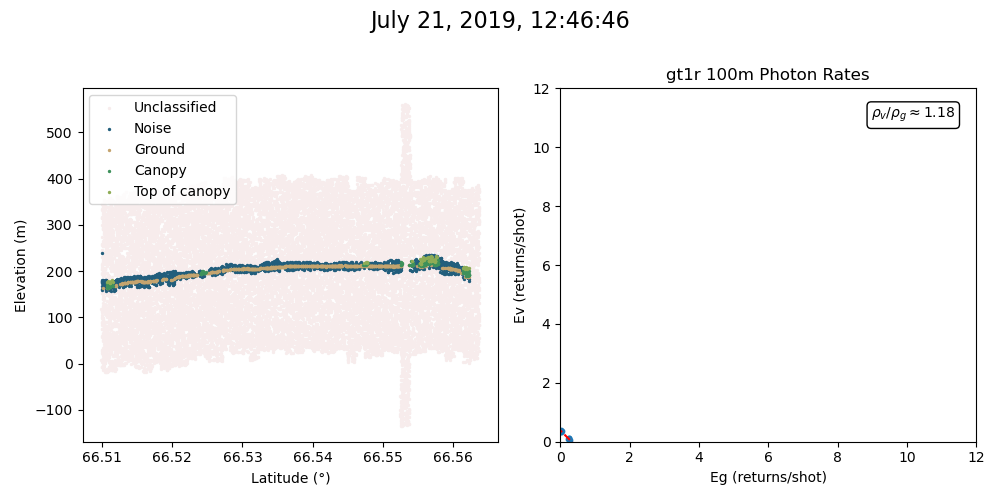

N = 7, s = 0.1
N = 8, s = 0.1


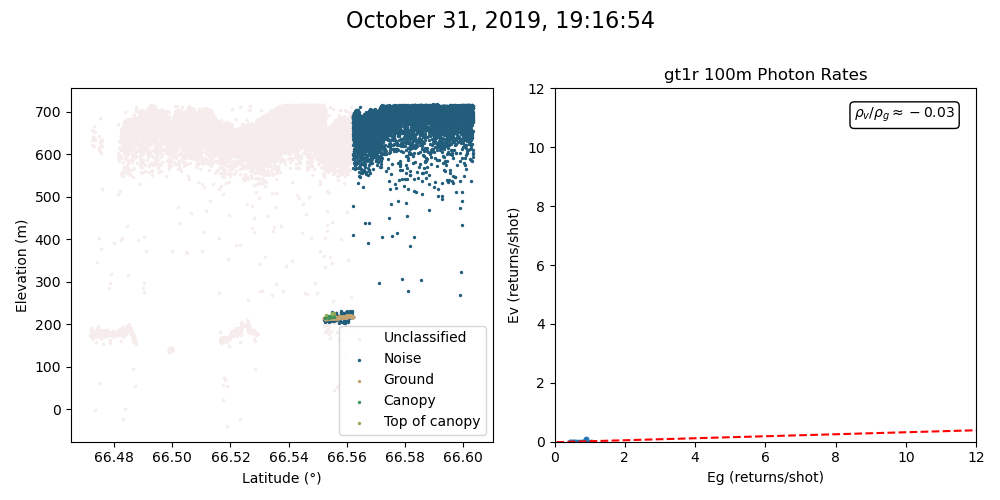

N = 9, s = 0.1
N = 10, s = 0.1


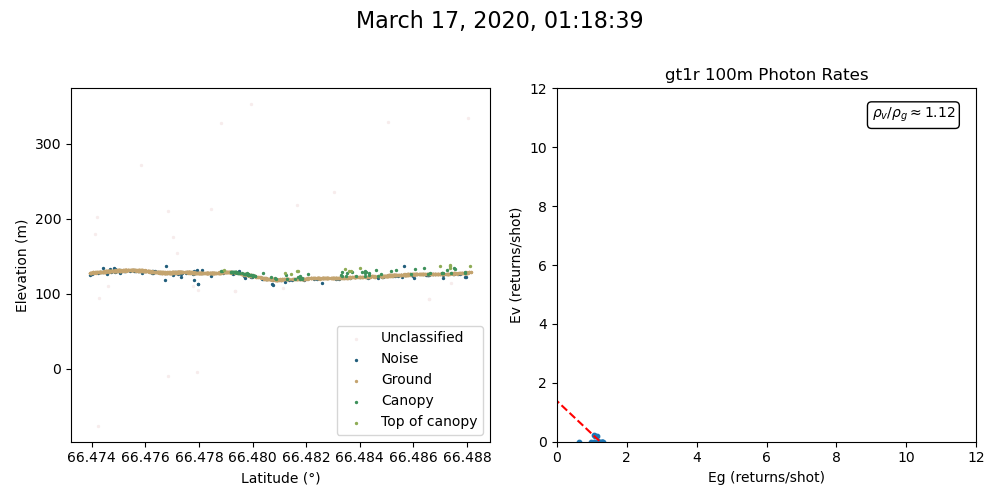

N = 11, s = 0.1
N = 12, s = 0.1


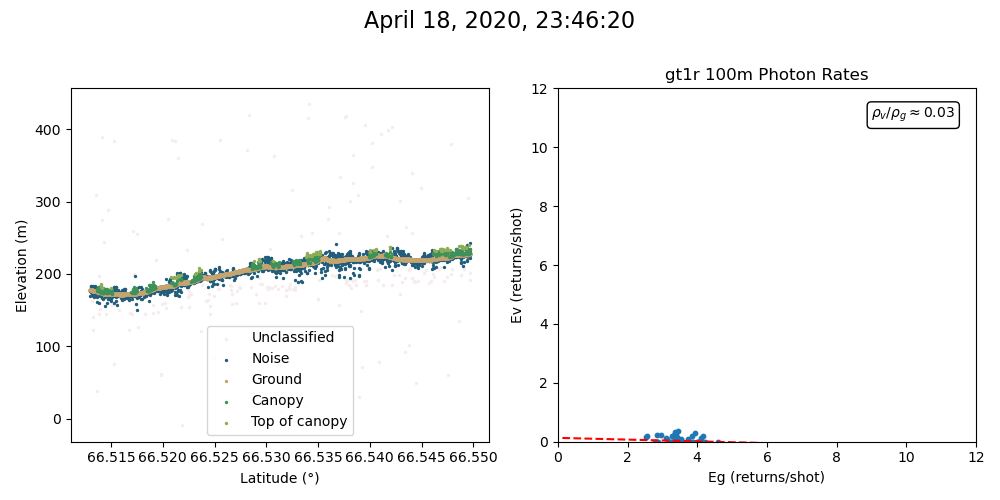

N = 13, s = 0.1


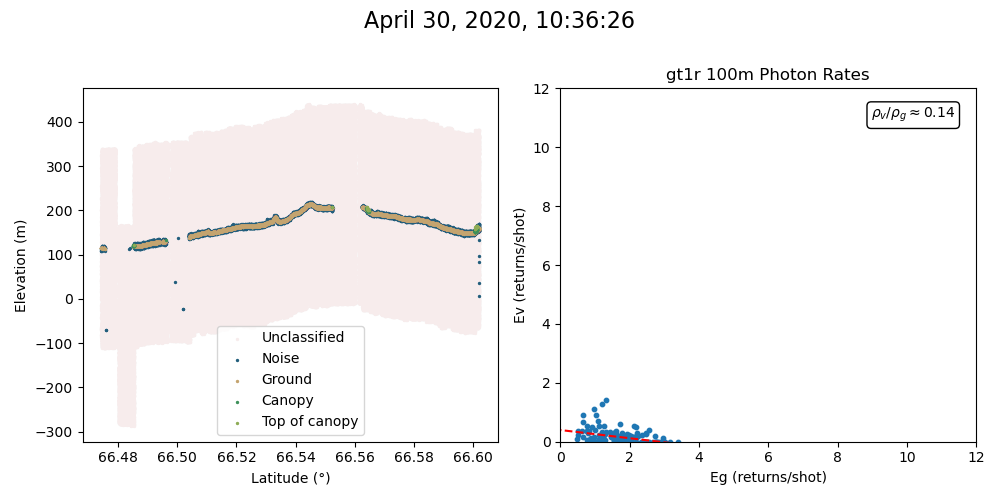

N = 14, s = 0.1


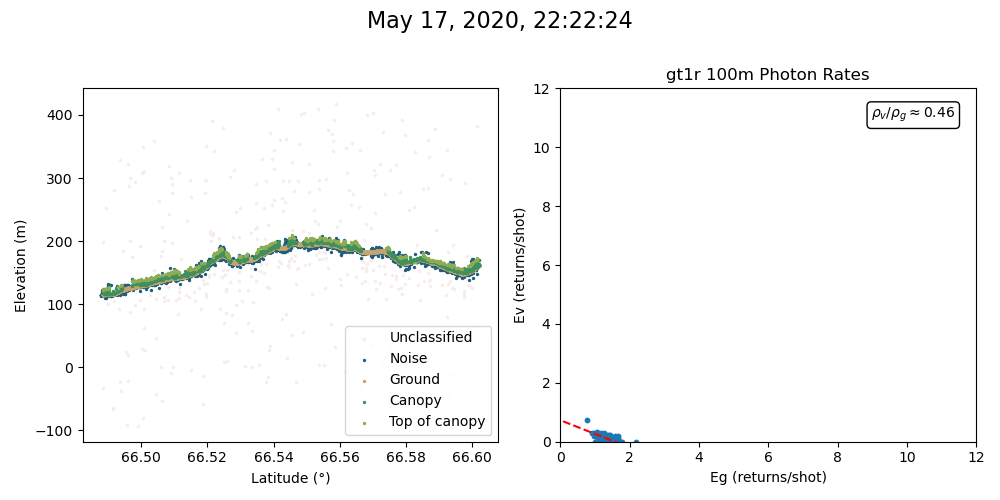

N = 15, s = 0.1


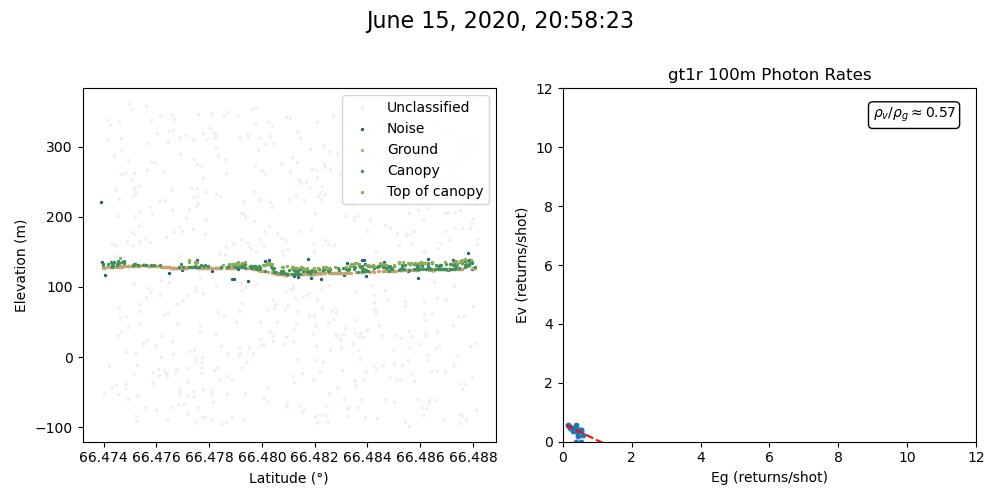

N = 16, s = 0.1


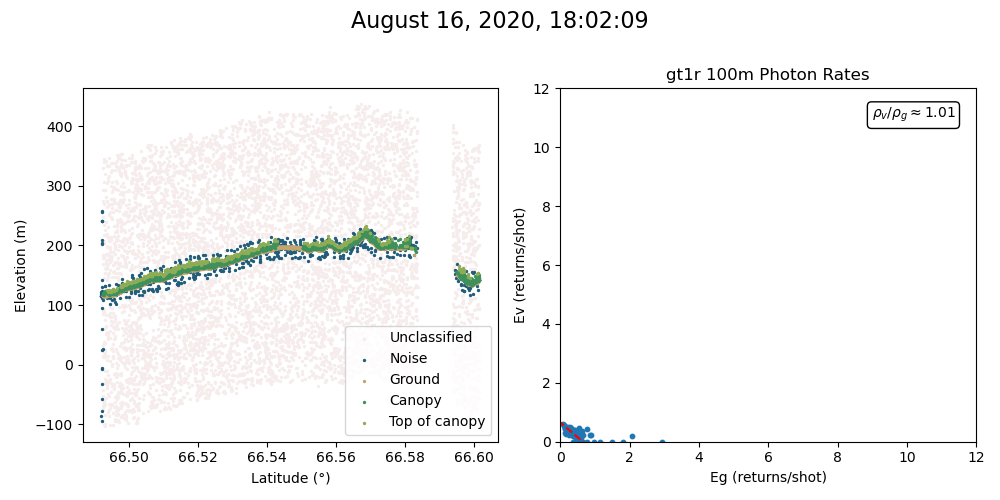

N = 17, s = 0.1


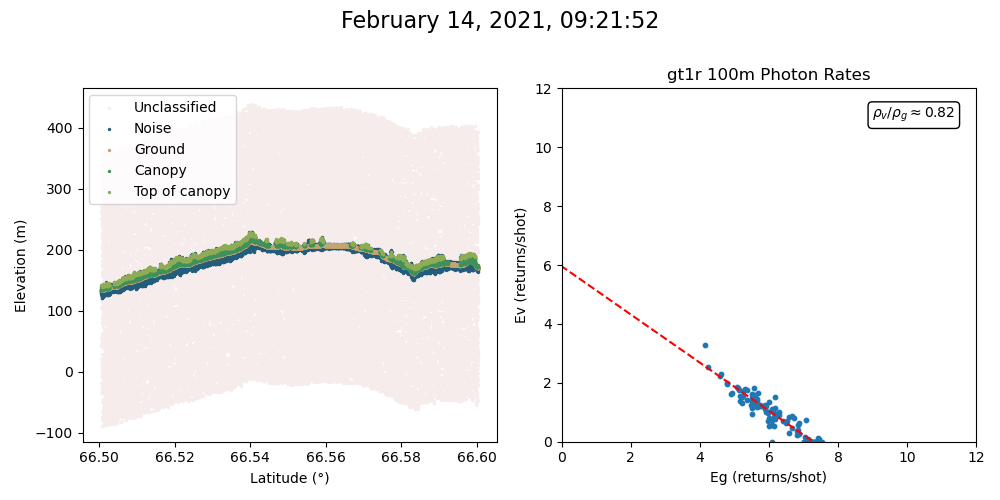

N = 18, s = 0.1
N = 19, s = 0.1
N = 20, s = 0.1


In [5]:
%matplotlib ipympl

dirpath = '../data/rovaniemi_w/'
all_ATL03, all_ATL08 = track_pairs(dirpath)

# N = len(all_ATL03)
gt = 'gt1r'

N = np.arange(0,21,1)
S = [.1]
for i in N:
    for s in S:
        print('N = ' + str(i) + ', s = ' + str(s))
        atl03path = all_ATL03[i]
        atl08path = all_ATL08[i]
        pvpg_gt_penalized(atl03path, atl08path, gt, s)